In [3]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean

In [4]:

import pandas as pd
import numpy as np
dutch = pd.read_csv(r'C:\Users\sgoethals\Dropbox\PC (2)\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\Data\dutch.csv')
X=dutch.drop(columns=[ 'occupation'])
y = dutch.loc[:, 'occupation']
X['sex']=[1 if X.loc[i,'sex']=='female' else 0 for i in range(len(X))]
good_outcome=1
bad_outcome=0
sens_var='sex'
sensitive_value=1
y.value_counts(normalize=True)

0    0.523949
1    0.476051
Name: occupation, dtype: float64

In [1]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\clean_functions.py"

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[FairAdapt]'


In [5]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.9152882430643392
The AUC of the biased model (test set) is: 0.9170348812179477
The AUC of the biased model for the protected group (validation set) is: 0.9072149191547576
The AUC of the biased model for the privileged group (validation set) is: 0.8888151946567382
The AUC of the biased model for the protected group (test set) is: 0.9144563641520248
The AUC of the biased model for the privileged group (test set) is: 0.8844179913465852
Calculate demographic parity


100%|██████████| 100/100 [16:52<00:00, 10.12s/it]


Calculate equality of opportunity


 48%|████▊     | 48/100 [3:49:38<7:09:24, 495.48s/it] 

In [9]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.5010261502813638
Percentage of people with the target value 0.47600132406487916
The base rate disparity is 0.29854558596196745


In [5]:
#base rate disparity
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))

The base rate disparity is 0.29854558596196745
The average cost of fairness (DP) is 0.03080030391386778
The average cost of fairness (EO) is 0.012563843045656315


In [6]:
# save results
import pickle

with open(f'Results/Dutch_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Dutch_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

In [7]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\visualisations.py"

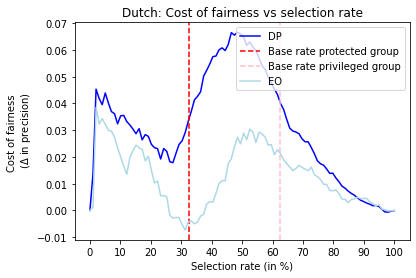

In [8]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Dutch'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')   